In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

mens_df=pd.read_csv("TDF_Riders_History.csv")

# Get info on datatypes and columns 
mens_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9878 entries, 0 to 9877
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        9878 non-null   int64 
 1   Rank              9878 non-null   int64 
 2   Rider             9878 non-null   object
 3   Rider No.         9878 non-null   int64 
 4   Team              9878 non-null   object
 5   Times             9878 non-null   object
 6   Gap               9878 non-null   object
 7   B                 222 non-null    object
 8   P                 56 non-null     object
 9   Year              9878 non-null   int64 
 10  Distance (km)     9878 non-null   int64 
 11  Number of stages  9878 non-null   int64 
 12  TotalSeconds      9878 non-null   int64 
 13  GapSeconds        9878 non-null   int64 
 14  ResultType        9804 non-null   object
dtypes: int64(8), object(7)
memory usage: 1.1+ MB


In [2]:
# Remove null values from the seconds column (prevent errors in avg speed calculation)

mens_df.dropna(subset ="ResultType", inplace=True)
mens_df.isna().sum()

Unnamed: 0             0
Rank                   0
Rider                  0
Rider No.              0
Team                   0
Times                  0
Gap                    0
B                   9582
P                   9748
Year                   0
Distance (km)          0
Number of stages       0
TotalSeconds           0
GapSeconds             0
ResultType             0
dtype: int64

In [3]:
# Import CSV data for Tour De France Femmes 

womens_df = pd.read_csv ("TDFF_Riders_History.csv")

# check for null values 
womens_df.isna().sum()


Unnamed: 0            0
Rank                  0
Rider                 0
Rider No.             0
Team                  0
Times                 0
Gap                   0
B                   200
P                   228
Year                  0
Distance (km)         0
Number of stages      0
TotalSeconds          0
GapSeconds            0
ResultType            0
dtype: int64

In [4]:
# Add a gender column to the dataset to differenciate women participants from males before combining both dataframes
womens_df["Gender"] = "Female"

In [5]:
# combine both data frames 
df = pd.concat([mens_df, womens_df])

#drop unwanted columns from the combined dataframe 
df.drop(columns=["B","P"], inplace = True)

# remove cyclist that were ranked based on points and not position 
points = df [df["ResultType"]=="points"].index
df.drop(points, inplace = True)

In [6]:
# Use lambda function to identify each male in the dataset

df["Gender"] = df["Gender"].apply (lambda x: "Male" if x!="Female" else x)

# Calculate average speed for each cyclist 

#Format average speed 
pd.options.display.float_format = '{:.1f}'.format

df["Average_Speed (kph)"] =  df["Distance (km)"]/(df["TotalSeconds"]/3600)

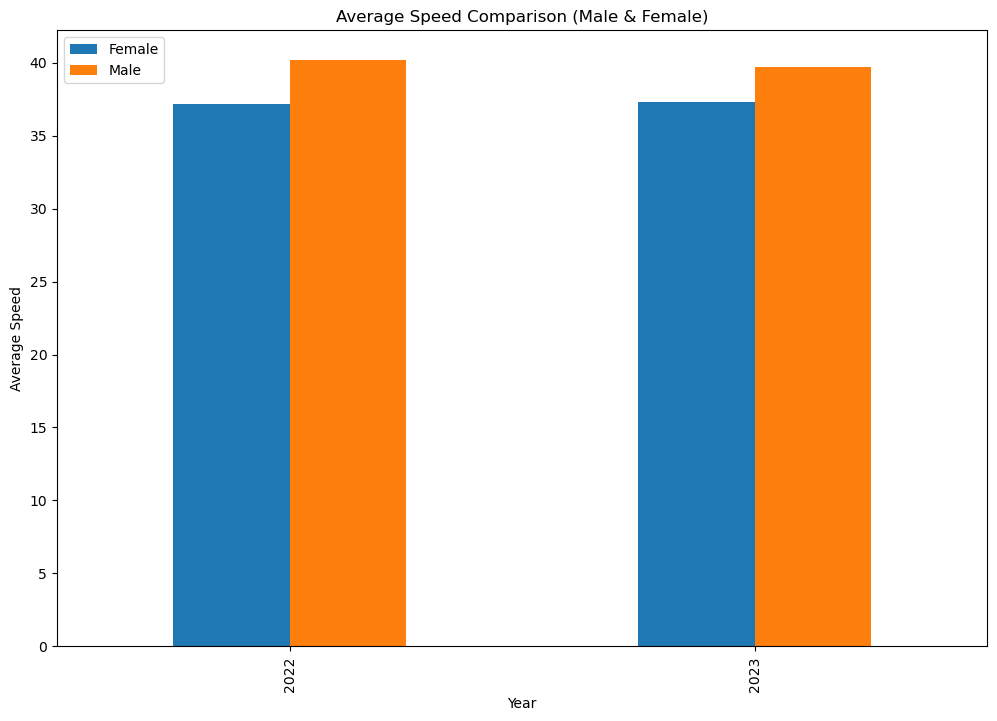

In [36]:
# what is the difference in average speed between males and females 

# Filter the dataframe to find the start year for females in this dataset 
df [df["Gender"]=="Female"]["Year"].unique()

# filter the df to include years only if data is there for male and female participants 
filtered_df = df.query("Year>= 2022 and Year<=2023")

# Use group by to calculate the average speed for all participants by year then gender 
avg_speed_gender = filtered_df.groupby(["Year", "Gender"],as_index=False)["Average_Speed (kph)"].mean()

# Visual of the result 

avg_speed_gender.pivot(index = "Year", columns="Gender", values="Average_Speed (kph)").plot (kind='bar', figsize=(12, 8))
plt.xlabel("Year")
plt.ylabel("Average Speed")
plt.title("Average Speed Comparison (Male & Female)")
plt.legend(loc = 'upper left')
plt.show()

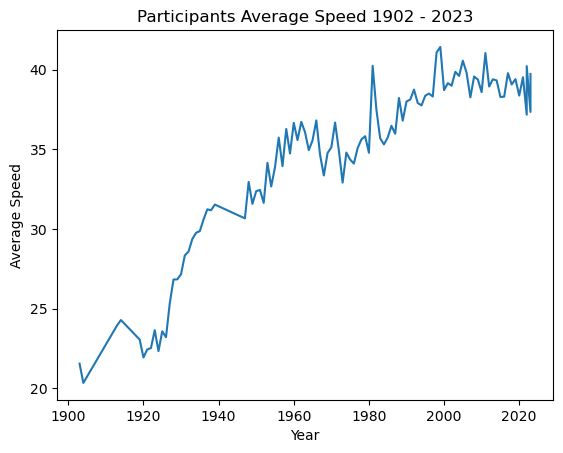

In [8]:
# Create a visual to show average speed changes since the 1903
avg_speed_year = df.groupby(["Year", "Distance (km)"],as_index=False)["Average_Speed (kph)"].mean()
x = avg_speed_year["Year"]
y = avg_speed_year["Average_Speed (kph)"]
plt.plot (x,y)
plt.xlabel("Year")
plt.ylabel ("Average Speed")
plt.title ("Participants Average Speed 1902 - 2023")
plt.show()


In [9]:
# There was a steady incline in overall speed between 1925 - 1940. Was the distance of the race the same?

# filter dataframe to include only years between 1920 - 1940
avg_speed_year.query ("Year >= 1920 and Year <= 1940")

#average speed increased steadily between 1926 - 1939 although the distance was about the same







,Year,Distance (km),Average_Speed (kph)
5,1920,5503,21.9
6,1921,5485,22.4
7,1922,5375,22.5
8,1923,5386,23.6
9,1924,5425,22.3
10,1925,5440,23.6
11,1926,5745,23.2
12,1927,5398,25.3
13,1928,5476,26.8
14,1929,5286,26.8


In [10]:
#Were the top cyclist achieving higher average speeds than the prior year 

# what were the top average speeds in comparison to year prior to the spike

# filter the data frame so include only the 5 cyclist for years (1926,1927,1938,1939)
df[ df["Rank"].between(1,5) & df ["Year"].isin([1926,1927,1938,1939])]\
[["Rider", "Rank", "Year", "Average_Speed (kph)"]]


,Rider,Rank,Year,Average_Speed (kph)
630,LUCIEN BUYSSE,1,1926,24.1
631,NICOLAS FRANTZ,2,1926,23.9
632,BARTOLOMEO AIMO,3,1926,23.9
633,THÉOPHILE BEECKMAN,4,1926,23.9
634,FÉLIX SELLIER,5,1926,23.9
670,NICOLAS FRANTZ,1,1927,27.2
671,MAURICE DE WAELE,2,1927,27.0
672,JULIEN VERVAECKE,3,1927,26.9
673,ANDRÉ LEDUCQ,4,1927,26.8
674,ADELIN BENOIT,5,1927,26.6


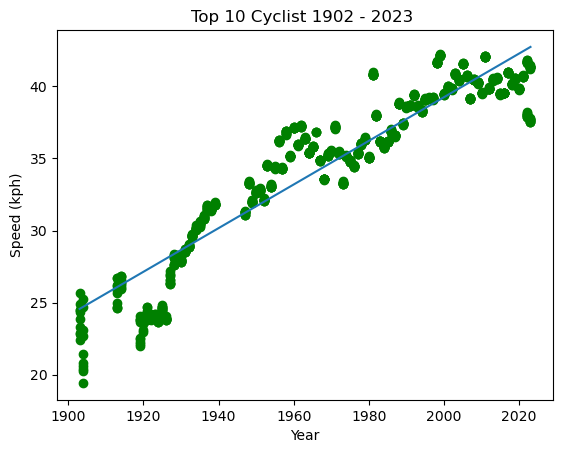

In [11]:
#What is the overall trend for average speed amonst the top performers since the start of Tour De France

# filter frame to include only top 10 cyclist for each year 
top_cyclist_df = df.query ("Rank>=1 and Rank <=10")
x = top_cyclist_df["Year"]
y = top_cyclist_df["Average_Speed (kph)"]

# create a scatter plot with a trend line to respresent the data 
plt.scatter(x, y, color="green")
z = np.polyfit(x, y,1)
p = np.poly1d(z)
plt.title("Top 10 Cyclist 1902 - 2023 ")
plt.xlabel("Year")
plt.ylabel("Speed (kph)")
plt.plot(x, p(x))

In [12]:
# What's the record for the most Tour de France wins

# filter df to include only the winners based on the Rank column. Remove unwanted columns 
winners_df = df [df["Rank"]==1][["Rider","Year", "Team","Average_Speed (kph)"]]

#count the amount of times each rider appears in the dataset 
res = winners_df["Rider"].value_counts()

#get the max amount of wins and return the name of each rider that meets the criteria as an index
max = res [res == res.max()].index

# use the loc funtion to find each rider in the dataframe that is equal to the index above
winners_df.loc[winners_df["Rider"].isin(max)][["Rider","Year","Average_Speed (kph)"]]

,Rider,Year,Average_Speed (kph)
1921,JACQUES ANQUETIL,1957,34.4
2200,JACQUES ANQUETIL,1961,36.0
2272,JACQUES ANQUETIL,1962,37.3
2365,JACQUES ANQUETIL,1963,36.5
2440,JACQUES ANQUETIL,1964,35.4
2769,EDDY MERCKX,1969,35.4
2855,EDDY MERCKX,1970,35.6
2954,EDDY MERCKX,1971,37.3
3048,EDDY MERCKX,1972,35.5
3223,EDDY MERCKX,1974,35.2


In [13]:
# Which Cyclist had the most Tour De France performances? 
res = df["Rider"].value_counts()
max = res [res == res.max()].index
df.loc[df["Rider"].isin(max)][["Rider","Team","Average_Speed (kph)"]]


,Rider,Team,Average_Speed (kph)
6448,SYLVAIN CHAVANEL,BONJOUR,39.2
6561,SYLVAIN CHAVANEL,BONJOUR,39.4
6714,SYLVAIN CHAVANEL,BRIOCHES LA BOULANGERE,40.3
6852,SYLVAIN CHAVANEL,BRIOCHES LA BOULANGERE,40.1
7022,SYLVAIN CHAVANEL,COFIDIS CREDIT PAR TELEPHONE,40.7
7161,SYLVAIN CHAVANEL,COFIDIS CREDIT PAR TELEPHONE,40.0
7454,SYLVAIN CHAVANEL,COFIDIS CREDIT PAR TELEPHONE,39.6
7556,SYLVAIN CHAVANEL,QUICK STEP,40.1
7717,SYLVAIN CHAVANEL,QUICK STEP,39.2
7914,SYLVAIN CHAVANEL,QUICK STEP CYCLING TEAM,41.2


In [14]:
# Which teams has the most Tour De France wins 

res = winners_df["Team"].value_counts()
max = res [res == res.max()].index
winners_df.loc[winners_df["Team"].isin(max)][["Rider","Team","Year","Average_Speed (kph)"]]


,Rider,Team,Year,Average_Speed (kph)
808,ANDRÉ LEDUCQ,FRANCE,1930,28.0
866,ANTONIN MAGNE,FRANCE,1931,28.7
901,ANDRÉ LEDUCQ,FRANCE,1932,29.0
958,GEORGES SPEICHER,FRANCE,1933,29.7
998,ANTONIN MAGNE,FRANCE,1934,30.4
1126,ROGER LAPEBIE,FRANCE,1937,31.8
1619,LOUISON BOBET,FRANCE,1953,34.6
1695,LOUISON BOBET,FRANCE,1954,33.2
1764,LOUISON BOBET,FRANCE,1955,34.4
2200,JACQUES ANQUETIL,FRANCE,1961,36.0
